In [1]:
import os
import tensorflow as tf
import keras.backend as K

# set gpu id and tf settings
gpu_ids = [3]
os.environ['CUDA_VISIBLE_DEVICES']=','.join([str(g) for g in gpu_ids])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))



Using TensorFlow backend.


In [2]:

# load dataset
ds_key = 'adni-100-csts2'

from dataset_utils import adni_loader
import vte_runner

eval_data_params = vte_runner.named_vte_data_params[ds_key]
print(eval_data_params)
#eval_data_params['load_vols'] = False
eval_ds = adni_loader.ADNIDataset(eval_data_params)
_ = eval_ds.load_dataset()


../cnn_utils/vis_utils.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
../cnn_utils/vis_utils.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


{'dataset_name': 'adni', 'source_name': 'centroidsubj2', 'target_name': 'subjs', 'unnormalized': True, 'masked': True, 'n_shot': 1, 'use_atlas_as_source': False, 'use_subject': 'OASIS_OAS1_0327_MR1_mri_talairach_orig', 'img_shape': (160, 192, 224, 1), 'pred_img_shape': (160, 192, 1), 'aug_img_shape': (160, 192, 224, 1), 'n_unlabeled': 100, 'n_validation': 50, 'load_vols': True, 'aug_in_gen': True, 'n_vte_aug': None, 'n_flow_aug': None, 'use_labels': [0, 16, 10, 49, 8, 47, 4, 43, 7, 46, 12, 51, 2, 41, 28, 60, 11, 50, 13, 52, 17, 53, 14, 15, 18, 54, 24, 3, 42, 31, 63], 'final_test': False, 'warp_labels': True, 'n_dims': 3}
Loading adni dataset adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l
Params: {'dataset_name': 'adni', 'source_name': 'centroidsubj2', 'target_name': 'subjs', 'unnormalized': True, 'masked': True, 'n_shot': 1, 'use_atlas_as_source': False, 'use_subject': 'OASIS_OAS1_0327_MR1_mri_talairach_orig', 'img_shape': (160, 192, 224, 1), 'pred_img_shape': (160, 192, 1), 'aug_img_

In [3]:
# load GLT model with bidir voxelmorph and color unet
load_from_dir = 'experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1'
from experiments_VTE import GLTExperimentClass
import json
with open(os.path.join(load_from_dir, 'arch_params.json'), 'r') as f:
    arch_params = json.load(f)
with open(os.path.join(load_from_dir, 'data_params.json'), 'r') as f:
    data_params = json.load(f)
exp = GLTExperimentClass.ExperimentGlobalLocalTransforms(arch_params=arch_params, data_params=data_params)
model_name = exp.get_model_name()
exp_dir = load_from_dir
figures_dir = os.path.join(exp_dir, 'figures')
models_dir = os.path.join(exp_dir, 'models')
logs_dir = os.path.join(exp_dir, 'logs')
exp.save_exp_info(exp_dir, figures_dir, models_dir, logs_dir)
exp.load_data(load_fewer=True)
_ = exp.create_models()
exp.load_models(models_dir, 'latest')



{'model_arch': 'voxelmorphbidir_flow_color', 'flow_arch': 'voxelmorphbidir', 'color_arch': 'voxelmorph2guha', 'save_every': 5, 'test_every': 5, 'local_transform_enc_params': {'nf_enc': [16, 32, 32, 32, 32, 32], 'nf_dec': [64, 64, 32, 32, 32, 16, 16], 'n_convs_per_stage': 1, 'use_residuals': False, 'use_maxpool': False, 'fully_conv': False}, 'local_only': True, 'global_only': False, 'transform_dec_params': {'nf_dec': [64, 64, 32, 32, 32, 32, 32], 'n_convs_per_stage': 1, 'use_residuals': False, 'fully_conv': False, 'use_upsample': True}, 'learn_logvar': False, 'transform_reg_flow': 'grad_l2', 'transform_reg_lambda_flow': 1, 'transform_reg_color': 'grad-30seg-l2', 'transform_reg_lambda_color': 1, 'warp_labels': True, 'input_segmentations_to_color': False, 'input_oh': False, 'input_contours': False, 'color_transform_in_tgt_space': False, 'color_transform_type': 'B_RGB', 'recon_loss_Iw': 'cc_vm', 'cc_loss_weight': 1, 'cc_win_size_Iw': 9, 'recon_loss_I': 'l2', 'freeze_flow': True, 'end_epoch

Got list of 7329 files from /data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/*.npz:
ADNI_ADNI-3T-FS-5.3-Long_293689.long.016_S_4591_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_78841.long.016_S_1326_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_436815.long.094_S_1330_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_296323.long.068_S_2168_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_388923.long.135_S_5273_base_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_272700.long.009_S_4388_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_394785.long.027_S_0408_base_mri_talairach_orig.npz
PPMI_3519_mri_talairach_orig.npz
ADNI_ADNI-3T-FS-5.3-Long_119158.long.053_S_0507_base_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_63306.long.007_S_0249_base_mri_talairach_orig.npz
ABIDE_50685_mri_talairach_orig.npz
ADNI_ADNI-1.5T-FS-5.3-Long_121666.long.041_S_1423_base_mri_talairach_orig.npz
GSP_120719_TT88SP_FS_mri_talairach_orig.npz
COBRE_0040043_mri

vm_bidir_bck_model
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_1 (InputLayer)                   (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
input_2 (InputLayer)                   (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
concatenate_1 (Concatenate)            (None, 160, 192, 224, 2)   0             input_1[0][0]                           
                                                                                input_2[0][0]                           
_____________

[2018-11-16 18:43:12] Looking for epoch latest in experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1/models
Flow shape: (?, 160, 192, 224, 3)
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[2018-11-16 18:43:16] Switching trainer model to SequentialBidir
[2018-11-16 18:43:16] ________________________________________________________________________________________________________________________
[2018-11-16 18:43:16] Layer (type)                           Output Shape               Param #       Connected to                            
[2018-11-16 18:43:16] ========================================================================================================================
[2018-11-16 18:43:16] img_input_src (InputLayer)             (None, 160, 192, 224, 1)   0                                 

[2018-11-16 18:43:16] Compiling full VTE model with 6 losses: ['total', 'smooth_flow_grad_l2', 'recon_flow_cc_vm', 'warped_bounds_dummy', 'smooth_color_grad-30seg-l2', 'color_transformed_srcspace_dummy', 'recon_color_l2']
[2018-11-16 18:43:16] Model output: Tensor("vm_bidir_fwd_model/flow/add:0", shape=(?, 160, 192, 224, 3), dtype=float32), loss fn: <function gradient_loss_l2.<locals>.compute_loss at 0x7f42216d6048>
[2018-11-16 18:43:16] Model output: Tensor("vm_bidir_fwd_model/spatial_transformer_2/map/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 160, 192, 224, 1), dtype=float32), loss fn: <bound method NCC.loss of <src.losses.NCC object at 0x7f42216d00f0>>
[2018-11-16 18:43:16] Model output: Tensor("warped_labels/Reshape:0", shape=(?, 160, 192, 224, 1), dtype=float32), loss fn: <function mean_squared_error at 0x7f42c549e598>
[2018-11-16 18:43:16] Model output: Tensor("color_delta_unet_srcspace/conv3d_23/add:0", shape=(?, 160, 192, 224, 1), dtype=float32), loss fn: <bound method

vm_bidir_bck_model
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_1 (InputLayer)                   (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
input_2 (InputLayer)                   (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
concatenate_1 (Concatenate)            (None, 160, 192, 224, 2)   0             input_1[0][0]                           
                                                                                input_2[0][0]                           
_____________

color_delta_unet_srcspace
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_src (InputLayer)                 (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
input_tgt (InputLayer)                 (None, 160, 192, 224, 1)   0                                                     
________________________________________________________________________________________________________________________
concatenate_11 (Concatenate)           (None, 160, 192, 224, 2)   0             input_src[0][0]                         
                                                                                input_tgt[0][0]                         
______

[2018-11-16 18:43:22] Looking for models in experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1/models
[2018-11-16 18:43:22] Loading model vm_bidir_fwd_model from experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1/models/vm_bidir_fwd_model_epoch1020_iter102000.h5
[2018-11-16 18:43:23] Loading model vm_bidir_bck_model from experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1/models/vm_bidir_bck_model_epoch1020_iter102000.h5
[2018-11-16 18:43:23] Loading model color_delta_unet_srcspace from experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c

1021

In [ ]:
# display flow and color targets independently, and output
import IPython
import PIL
import numpy as np
import vis_utils

# for segmentations
import sys
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import brain_vis_utils
labels_to_vis = [
    2, 41, # white matter
    3, 42, # gray matter?
    4, 43, # ventricles
    10, 49, # thalami
    17, 53, # hippocampus
    ]


%load_ext autoreload
%autoreload 2

slice_idx = 100

source_X = eval_ds.X_labeled_train[0]#adni_loader._load_vol_and_seg(ds.files_labeled_train[0], load_seg=False, mask_vol=ds.params['masked'])
source_Y = eval_ds.Y_labeled_train[0]

atlas_im = np.rot90(source_X[:, :, slice_idx], k=3)
atlas_segs_img = brain_vis_utils.draw_segs_on_slice(source_X[:, :, slice_idx], 
                                                    source_Y[:, :, slice_idx], 
                                                           
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)
print(atlas_segs_img.shape)
atlas_segs_img = np.rot90(atlas_segs_img, k=3)

from networks import transform_network_utils
seg_warp_model = transform_network_utils.warp_model(
    img_shape=source_X.shape,
    interp_mode='nearest',
    indexing='xy')

save_idxs = [3, 19, 37]
for i in save_idxs:
    flowtarget_X = eval_ds.X_labeled_valid[i]
    colortarget_X = eval_ds.X_labeled_valid[i + 1]
    
    preds = exp.tester_model.predict([source_X[np.newaxis], flowtarget_X[np.newaxis], colortarget_X[np.newaxis]])
    
    transformed = preds[-1]
    transformed_segs = seg_warp_model.predict([source_Y[np.newaxis, ..., np.newaxis], preds[0]])
    
    print(i)
    flowtgt_im = np.rot90(flowtarget_X[:, :, slice_idx], 3)
    colortgt_im = np.rot90(colortarget_X[:, :, slice_idx], 3)
    transformed_im = np.rot90(transformed[0, :, :, slice_idx], 3)
    segs_im = brain_vis_utils.draw_segs_on_slice(transformed[0, :, :, slice_idx], 
                                                    transformed_segs[0, :, :, slice_idx], 
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)
    segs_im = np.clip(np.rot90(segs_im, 3), 0., 1.)

    transformed_im = np.clip(transformed_im, 0., 1.)
    
    border = np.ones((atlas_im.shape[0], 10, 1))
    
    out_ims = [
        atlas_im, border, atlas_segs_img,
        border, border,border,
        flowtgt_im,
        border,border,border,
        colortgt_im,
        border, border,border,
        transformed_im,
        border, segs_im
    ]
    
    tiled_out_ims = out_ims[:]
    for i, im in enumerate(out_ims):
        if im.shape[-1] == 1:
            tiled_out_ims[i] = np.tile(im, (1, 1, 3))
    
    print([im.shape for im in tiled_out_ims])
    out_im = np.concatenate(tiled_out_ims, axis=1)
    
    IPython.display.display(PIL.Image.fromarray((out_im[..., [1, 0, 2]]*255).astype(np.uint8)))    
    
    # display images independently
#     IPython.display.display(PIL.Image.fromarray((target_im[:, :, slice_idx, 0]*255).astype(np.uint8)))
#     IPython.display.display(PIL.Image.fromarray((flow_im[..., [1, 0, 2]]).astype(np.uint8)))
#     IPython.display.display(PIL.Image.fromarray((color_im).astype(np.uint8)))


In [4]:
# load models
# sas
import sys
vm_file = './experiments/voxelmorph/vm2_cc_AtoUMS_100k_CStoUMS_xy_iter40000.h5'
vm_bck_file = './experiments/voxelmorph/vm2_cc_AtoUMS_100k_UMStoCS_xy_iter40000.h5'
sys.path.append('../voxelmorph-sandbox')
import voxelmorph.networks as vm_networks

import tensorflow as tf
from voxelmorph import dense_3D_spatial_transformer
from keras.models import load_model

sys.path.append('../neuron')
import neuron.layers as nrn_layers
import neuron.utils as nrn_utils

import functools
vm_model = load_model(
    vm_file,
    custom_objects={'Dense3DSpatialTransformer': dense_3D_spatial_transformer.Dense3DSpatialTransformer, 
                    'interp_upsampling': vm_networks.interp_upsampling,
                    'meshgrid': vm_networks.meshgrid,
                    'tf': tf,
                    'VecInt': nrn_layers.VecInt,
                    'SpatialTransformer': functools.partial(nrn_layers.SpatialTransformer, indexing='xy'),
                    'nrn_utils': nrn_utils,
                    'nrn_layers': nrn_layers,
                   },
    compile=False,
)

# vm_bck_model = load_model(
#     vm_bck_file,
#     custom_objects={'Dense3DSpatialTransformer': dense_3D_spatial_transformer.Dense3DSpatialTransformer, 
#                     'interp_upsampling': vm_networks.interp_upsampling,
#                     'meshgrid': vm_networks.meshgrid,
#                     'tf': tf,
#                     'VecInt': nrn_layers.VecInt,
#                     'SpatialTransformer': nrn_layers.SpatialTransformer,
#                     'nrn_utils': nrn_utils,
#                     'nrn_layers': nrn_layers,
#                    },
#     compile=False,
# )

from networks import transform_network_utils
seg_warp_model = transform_network_utils.warp_model(
    img_shape=(160, 192, 224, 1),
    interp_mode='nearest',
    indexing='xy')


[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]
[(None, 160, 192, 224, 1), (None, 160, 192, 224, 3)]


[(192, 160, 3), (50, 5, 3), (192, 160, 3), (50, 5, 3), (192, 160, 3)]
2
True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs


/afs/csail.mit.edu/u/x/xamyzhao/.conda/envs/cvenv36/lib/python3.6/site-packages/ipykernel_launcher.py:100: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


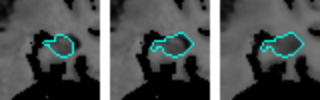

[(192, 160, 3), (50, 5, 3), (192, 160, 3), (50, 5, 3), (192, 160, 3)]
3
True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs


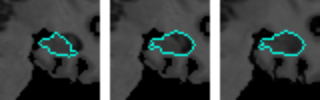

[(192, 160, 3), (50, 5, 3), (192, 160, 3), (50, 5, 3), (192, 160, 3)]
22
True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs


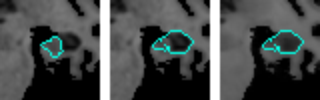

[(192, 160, 3), (50, 5, 3), (192, 160, 3), (50, 5, 3), (192, 160, 3)]
25
True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs


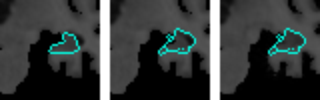

[(192, 160, 3), (50, 5, 3), (192, 160, 3), (50, 5, 3), (192, 160, 3)]
27
True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs


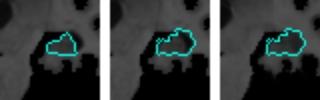

In [7]:
# pick a subject, then look specifically at a label where we do well at 
import sys
import numpy as np
import IPython
import PIL
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import brain_vis_utils

sys.path.append('../medipy-lib')
import medipy.metrics as medipy_metrics

import scipy.misc as spm

labels_to_vis = [
    #2, 41, # white matter
    #3, 42, # gray matter?
    #4, 43, # ventricles
    #11, 50, # caudate
    #12, 51, # putamen
    #60, 28, #ventralDC
    #8, 47, # cerebellum coretex,
    #10, 49, # thalami
    17, 53, # hippocampus
    ]
# labels_to_vis = None
slice_idx = 100
source_X = eval_ds.X_labeled_train[0]
source_Y = eval_ds.Y_labeled_train[0]
atlas_segs_img = brain_vis_utils.draw_segs_on_slice(source_X[:, :, slice_idx], 
                                                    source_Y[:, :, slice_idx], 
                                                           
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)

# print(atlas_segs_img.shape)
# atlas_segs_img = np.rot90(atlas_segs_img, k=3)
# IPython.display.display(PIL.Image.fromarray((atlas_segs_img[..., [1, 0, 2]]*255).astype(np.uint8)))


ul_idxs_to_show = [2, 25] #[2, 3, 22, 25, 27] #+  
#ul_idxs_to_show = list(range(5))
    
    
display_ims = []
for i in ul_idxs_to_show:#range(10):
    target_X = eval_ds.X_unlabeled_train[i]
    target_Y = eval_ds.Y_unlabeled_train[i]
    
    tgt_im = np.rot90(target_X[:, :, slice_idx], 3)
    
#     tgt_segs_im = brain_vis_utils.draw_segs_on_slice(target_X[:, :, slice_idx]* 1.5, 
#                                                     target_Y[:, :, slice_idx], 
#                                                        include_labels=labels_to_vis,
#                                                        draw_contours=True)
#     tgt_segs_im = np.rot90(tgt_segs_im, k=3)
    
    # use our model to synthesize an iamge and also label it
    ours_preds = exp.tester_model.predict([source_X[np.newaxis], target_X[np.newaxis], target_X[np.newaxis]])
    ours_segs = seg_warp_model.predict([source_Y[np.newaxis, ..., np.newaxis], ours_preds[0]])
    
    ours_transformed_im = np.clip(np.rot90(ours_preds[-1][0, :, :, slice_idx], 3), 0., 1.)
    
    ours_segs_im = brain_vis_utils.draw_segs_on_slice(ours_preds[-1][0, :, :, slice_idx]* 1.5, 
                                                    ours_segs[0, :, :, slice_idx], 
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)
    ours_segs_im = np.clip(np.rot90(ours_segs_im, 3), 0., 1.)
    ours_dice = medipy_metrics.dice(ours_segs[0, ..., 0], target_Y)
    
    # true segs
    target_segs_img = brain_vis_utils.draw_segs_on_slice(target_X[:, :, slice_idx]* 1.5, 
                                                        target_Y[:, :, slice_idx], 
                                                           include_labels=labels_to_vis,
                                                           draw_contours=True)
    target_segs_img = np.rot90(target_segs_img, 3)
    # predict warp and segs with sas
    sas_preds = vm_model.predict([source_X[np.newaxis], target_X[np.newaxis]])
    #sas_transformed = seg_warp_model.predict([source_X[np.newaxis],  sas_preds[-1]])
    # use an xy warp model since the SpatialTransformer doesnt load properly in the sas model
    sas_segs = seg_warp_model.predict([source_Y[np.newaxis, ..., np.newaxis], sas_preds[-1]])
    sas_segs_im = brain_vis_utils.draw_segs_on_slice(target_X[:, :, slice_idx]* 1.5, 
                                                    sas_segs[0, :, :, slice_idx], 
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)
    sas_segs_im = np.clip(np.rot90(sas_segs_im, 3), 0., 1.)
    sas_dice = medipy_metrics.dice(sas_segs[0, ..., 0], target_Y)
    
    #cropped_im = sas_segs_im[60:180, 20:140, :]
    border = np.ones((50, 5, 3))
    out_ims = [target_segs_img, border, sas_segs_im, border, ours_segs_im]
    
    out_ims = [np.tile(im, (1, 1, 3)) if im.shape[-1] == 1 else im for im in out_ims]
    print([im.shape for im in out_ims])
    
    # crop for both hippos
    #out_ims = [im[55:155, 30:130, :] if im.shape[0] == 192 else im for im in out_ims]
    out_ims = [im[90:140, 80:130, :] if im.shape[0] == 192 else im for im in out_ims]
    
    
    preds_im = np.clip(np.concatenate(out_ims, axis=1), 0., 1.)
    print(i)
    preds_im = np.clip(spm.imresize(preds_im, 2.), 0, 255).astype(np.uint8)
    
    #print('Ours {}, sas {}'.format(np.mean(ours_dice), np.mean(sas_dice)))
    print('True target, true target with true segs, our synth, our synth with warped segs, true target with warped segs')
    IPython.display.display(PIL.Image.fromarray((preds_im[..., [1, 0, 2]]).astype(np.uint8)))

    

In [8]:

color_file = './experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_color_c-srcsp_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1_l2_sigI0.1/models/color_delta_unet_srcspace_epoch1010_iter101000.h5'
#color_file = './experiments/GLT_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l-to-subjs_voxelmorphbidir_flow_cvae_color_c-srcsp_cvaeenc32-32-32-32-32-64-64_glatent50_imgskips_condcat_pt1000_frzflow_grad_l2_regfwt1_cc_vm_wt1_win9_grad-30seg-l2_regcwt1.4e+07_l2_sigI0.4/'
color_model = load_model(color_file)

/afs/csail.mit.edu/u/x/xamyzhao/.conda/envs/cvenv36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


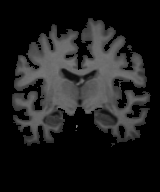

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
20


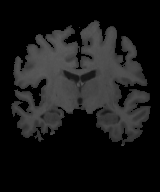

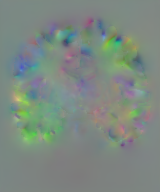

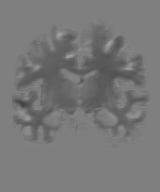

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
21


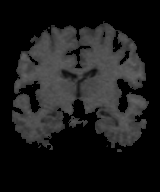

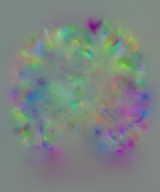

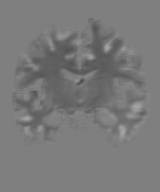

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
22


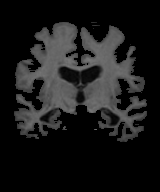

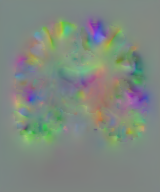

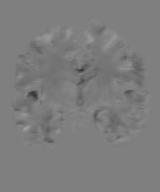

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
23


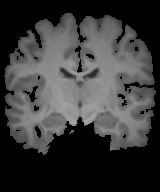

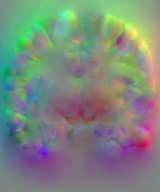

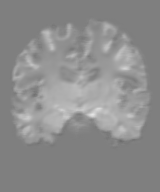

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
24


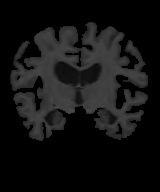

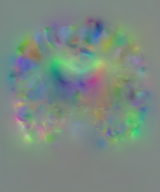

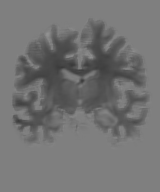

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
25


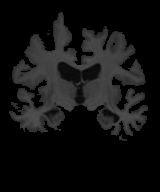

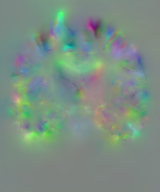

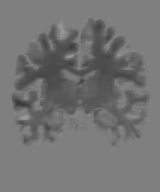

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
26


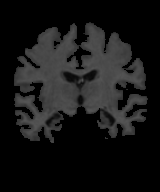

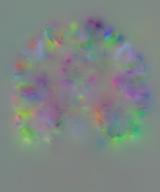

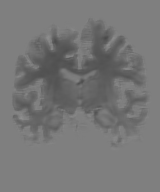

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
27


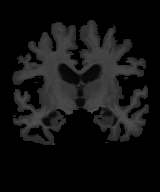

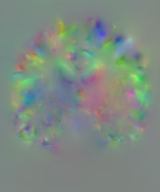

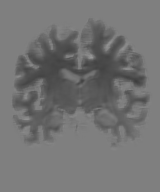

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
28


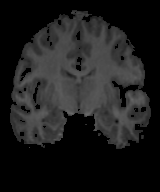

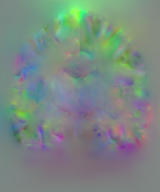

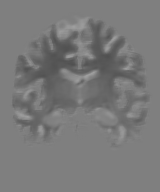

(1, 160, 192, 224, 3)
(160, 192, 3)
(1, 160, 192, 224, 1)
(160, 192, 3)
29


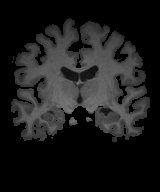

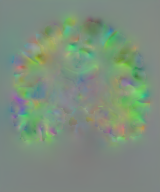

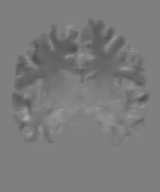

In [20]:
# display transforms individually
import IPython
import PIL
import numpy as np
import vis_utils
%load_ext autoreload
%autoreload 2


source_X = eval_ds.X_labeled_train[0]#adni_loader._load_vol_and_seg(ds.files_labeled_train[0], load_seg=False, mask_vol=ds.params['masked'])
source_Y = eval_ds.Y_labeled_train[0]

atlas_im = np.clip(np.rot90(source_X, k=3) * 1.4, 0., 1.)
slice_idx = 112

IPython.display.display(PIL.Image.fromarray((atlas_im[:, :, slice_idx, 0]*255).astype(np.uint8)))

for i in range(20,30):
    target_X = eval_ds.X_unlabeled_train[i]
    target_im = np.clip(np.rot90(target_X, k=3) * 1.4, 0., 1.)
    
    warped, flow = vm_model.predict([source_X[np.newaxis], target_X[np.newaxis]])
    print(flow.shape)
    flow_im, _, _ = vis_utils.flow_to_im(flow[0, :, :, slice_idx], clip_flow=10)
    print(flow_im.shape)
    flow_im = np.rot90(flow_im, k=3)
    
    warped_tgt, flow_bck = vm_model.predict([target_X[np.newaxis], source_X[np.newaxis]])
    color, _ = color_model.predict([source_X[np.newaxis], warped_tgt])
    print(color.shape)
    color_im = vis_utils.label_ims(color[:, :, :, slice_idx], None, normalize=True, clip_norm=0.3,
                                   display_h=color.shape[1])
    #color_im = np.clip(color_im, 150, 200)
    print(color_im.shape)
    color_im = np.rot90(color_im, 3)
    #color_im = np.clip(np.rot90(color_im, k=3)*1.4,0.,1.)
    
    # display images independently
    print(i)
    IPython.display.display(PIL.Image.fromarray((target_im[:, :, slice_idx, 0]*255).astype(np.uint8)))
    IPython.display.display(PIL.Image.fromarray((flow_im[..., [1, 0, 2]]).astype(np.uint8)))
    IPython.display.display(PIL.Image.fromarray((color_im).astype(np.uint8)))


(160, 192, 3)


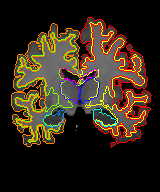

(160, 192, 3)


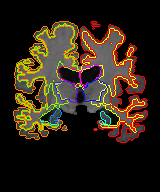

In [24]:
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import brain_vis_utils

labels_to_vis = [
    2, 41, # white matter
    3, 42, # gray matter?
    4, 43, # ventricles
    10, 49, # thalami
    17, 53, # hippocampus
    ]


atlas_segs_img = brain_vis_utils.draw_segs_on_slice(source_X[:, :, slice_idx]*1.4, 
                                                    source_Y[:, :, slice_idx], 
                                                           
                                                       include_labels=labels_to_vis,
                                                       draw_contours=True)
print(atlas_segs_img.shape)
atlas_segs_img = np.rot90(atlas_segs_img, k=3)
IPython.display.display(PIL.Image.fromarray((atlas_segs_img[..., [1, 0, 2]]*255).astype(np.uint8)))


for i in [22]:#range():
    target_X = eval_ds.X_unlabeled_train[i]
    target_Y = eval_ds.Y_unlabeled_train[i]
    
    
    target_segs_img = brain_vis_utils.draw_segs_on_slice(target_X[:, :, slice_idx]*1.4, 
                                                        target_Y[:, :, slice_idx], 

                                                           include_labels=labels_to_vis,
                                                           draw_contours=True)
    print(target_segs_img.shape)
    target_segs_img = np.rot90(target_segs_img, k=3)
    IPython.display.display(PIL.Image.fromarray((target_segs_img[..., [1, 0, 2]]*255).astype(np.uint8)))
    